# Notebook for reproducing CL simulations in Fig 3

In [1]:
%mkdir -p subfigs-Fig3

In [2]:
import numpy as np
from mbhl.simulation import Mask, Physics, System, Circle, Rectangle, Square
from mbhl.simulation import nm, um
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.auto import tqdm

## 1. Simulation using trigonometry of square and hexagonal lattices

In [3]:
def cal_half_alpha(L, R):
    """Solve \alpha / 2 using R adn L
    """
    A = (L**2 + R**2 - 1) / (2 * R * L)
    half_alpha = np.arccos(A)
    if np.isnan(half_alpha):
        half_alpha = 0
    return half_alpha


def calc_Pc(R, lamb, system="square", positive=True):
    """Calculate the Pc value for square and hexagonal lattice from trigonometric models"""
    assert R > 0
    assert lamb >= 2
    sum_P = 0
    max_lk = int(R) + 2
    for l in np.arange(-max_lk, max_lk + 1, 1):
        for k in np.arange(-max_lk, max_lk + 1, 1):
            if system == "square":
                L = np.sqrt(l**2 + k**2) * lamb
            elif system == "hexagonal":
                L = np.sqrt((l + k / 2) ** 2 + k**2 * (3 / 4)) * lamb
            else:
                raise ValueError("Unknown system")
            if L == 0:
                if R < 1:
                    sum_P += 1
            else:
                half_alpha = cal_half_alpha(L, R)
                sum_P += half_alpha / np.pi
    return sum_P

In [4]:
def plot_square_Pc_heatmap(
    ax, R=8.0, L_list=[8 / 1.414, 6.5, 8, 10], cmap="viridis", samples=256
):
    """Plot the heatmap of Pc values for square lattice nanoapertures

    The results are cached in "subfigs-Fig3/Pc-square.npy", 
    if you need to restart the calculations and / or change the sample size, 
    delete the corresponding files
    """
    L_list = np.array(L_list)
    lamb_array = np.linspace(0.1, 15, samples) + 2
    R_array = np.linspace(1.5, 15, samples)
    sump = []
    ll, RR = np.meshgrid(lamb_array, R_array)
    
    data_file = Path("subfigs-Fig3/Pc-square.npy")
    if not data_file.exists():
        for ll, rr in tqdm(zip(ll, RR), total=ll.shape[0]):
            sump.append([calc_Pc(R=r_, lamb=l_, system="square") for r_, l_ in zip(rr, ll)])
        sump = np.array(sump)
        np.save(data_file, sump)
    else:
        sump = np.load(data_file)
    ax.imshow(
        sump,
        origin="lower",
        aspect="auto",
        extent=(
            np.min(lamb_array),
            np.max(lamb_array),
            np.min(R_array),
            np.max(R_array),
        ),
        interpolation="bicubic",
        cmap=cmap,
    )
    for RL_ratio in [5**0.5, 2, 2**0.5, 1]:
        RRR = lamb_array * RL_ratio
        ax.plot(lamb_array, RRR, "--", color="white")
    ax.axhline(y=R, ls="--", color="white")
    ax.plot(
        L_list[[0, 2]],
        [
            R,
        ]
        * 2,
        "o",
        color="tab:pink",
    )
    ax.plot(
        L_list[[1, 3]],
        [
            R,
        ]
        * 2,
        "o",
        color="tab:cyan",
    )
    ax.set_xlim(np.min(lamb_array), 12)
    ax.set_ylim(np.min(R_array), np.max(R_array))
    ax.set_ylabel("$R/r$")
    ax.set_xlabel("$L/r$")
    ax.set_title("Square-Lattice Mask")
    return

def plot_hex_Pc_heatmap(
    ax, R=8.0, L_list=[8 / 1.732, 6, 8, 10], cmap="viridis", samples=256
):
    """Plot the heatmap of Pc values for hexagonal lattice nanoapertures

    The results are cached in "subfigs-Fig3/Pc-hex.npy", 
    if you need to restart the calculations and / or change the sample size, 
    delete the corresponding files
    """
    L_list = np.array(L_list)
    lamb_array = np.linspace(0.1, 15, samples) + 2
    R_array = np.linspace(1.5, 15, samples)
    sump = []
    ll, RR = np.meshgrid(lamb_array, R_array)
    from tqdm.auto import tqdm

    data_file = Path("subfigs-Fig3/Pc-hex.npy")
    if not data_file.exists():
        for ll, rr in tqdm(zip(ll, RR), total=ll.shape[0]):
            sump.append(
                [calc_Pc(R=r_, lamb=l_, system="hexagonal") for r_, l_ in zip(rr, ll)]
            )
        sump = np.array(sump)
        np.save(data_file, sump)
    else:
        sump = np.load(data_file)
    ax.imshow(
        sump,
        origin="lower",
        aspect="auto",
        extent=(
            np.min(lamb_array),
            np.max(lamb_array),
            np.min(R_array),
            np.max(R_array),
        ),
        interpolation="bicubic",
        cmap=cmap,
    )
    for RL_ratio in [7**0.5, 2, 3**0.5, 1]:
        RRR = lamb_array * RL_ratio
        ax.plot(lamb_array, RRR, "--", color="white")
    ax.axhline(y=R, ls="--", color="white")
    ax.plot(
        L_list[[0, 2]],
        [
            R,
        ]
        * 2,
        "o",
        color="tab:pink",
    )
    ax.plot(
        L_list[[1, 3]],
        [
            R,
        ]
        * 2,
        "o",
        color="tab:cyan",
    )
    ax.set_xlim(np.min(lamb_array), 12)
    ax.set_ylim(np.min(R_array), np.max(R_array))
    ax.set_yticks([])
    ax.set_xlabel("$L/r$")
    ax.set_title("Hexagonal-Lattice Mask")
    return

def plot_colorbar(cax, cmap="viridis"):
    fig, ax = plt.subplots(1, 1)
    im = ax.imshow([[0, 1], [1, 0]], cmap=cmap)
    fig.colorbar(im, cax=cax)

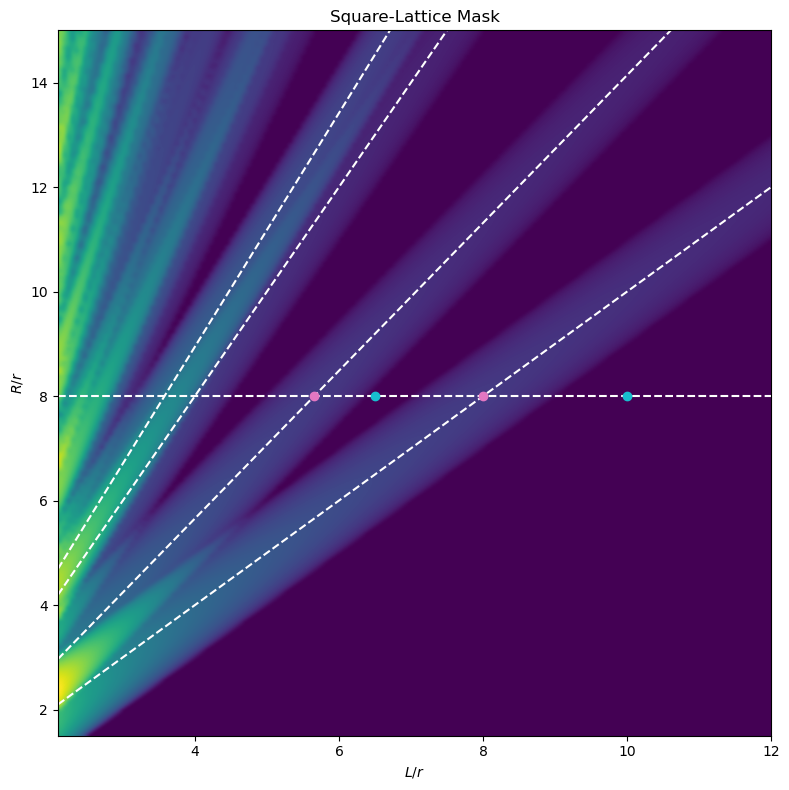

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_square_Pc_heatmap(ax)
fig.tight_layout()
fig.savefig("subfigs-Fig3/square-Pc-heatmap.png", dpi=300)

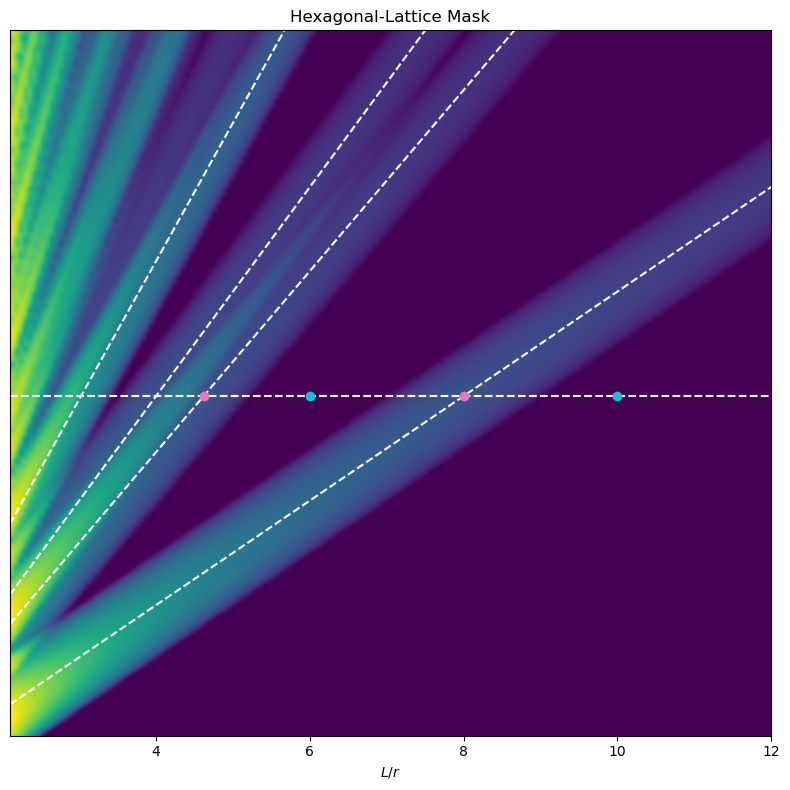

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_hex_Pc_heatmap(ax)
fig.tight_layout()
fig.savefig("subfigs-Fig3/hex-Pc-heatmap.png", dpi=300)

## Plot the heatmap for square and hexagonal latttice nanoapertures 

In [7]:
def plot_square_CL_pattern(ax, psi=5.0, Rr_ratio=6.0, Lr_ratio=5, cmap="magma"):
    psi = np.deg2rad(psi)
    radius = 50 * nm
    H = radius * Rr_ratio / np.tan(psi)

    trajectory = np.array(
        [(psi, theta) for theta in np.deg2rad(np.linspace(0, 360, 720))]
    )
    phys = Physics(trajectory, diffusion=15 * nm, drift=0 * nm)
    W = Lr_ratio * radius
    mask = Mask(
        [Circle(0, 0, radius)],
        unit_cell=(W, W),
        repeat=(20, 20),
        pad=50 * nm,
        thickness=0 * nm,
        spacing=H,
    )
    system = System(mask=mask, physics=phys)
    conv = system.simulate(h=(W / 100 / nm) * nm)
    ax.set_axis_off()
    system.draw(
        ax,
        mask_alpha=1.0,
        show_mask=True,
        mask_lw=2,
        dimension_ratio=radius,
        cmap=cmap,
        xlim=(10, 50),
        ylim=(10, 50),
    )
    ax.set_title(f"$R/L$={Rr_ratio / Lr_ratio:.1f}")
    return


def plot_hex_CL_pattern(ax, psi=5.0, Rr_ratio=8.0, Lr_ratio=5, cmap="magma"):
    psi = np.deg2rad(psi)
    radius = 50 * nm
    H = radius * Rr_ratio / np.tan(psi)

    trajectory = np.array(
        [(psi, theta) for theta in np.deg2rad(np.linspace(0, 360, 720))]
    )
    phys = Physics(trajectory, diffusion=15 * nm, drift=0 * nm)
    spacing = Lr_ratio
    W = spacing * radius
    mask = Mask(
        [Circle(0, 0, radius), Circle(W / 2, W / 2 * np.sqrt(3), radius)],
        unit_cell=(W, W * 3**0.5),
        repeat=(20, 15),
        pad=50 * nm,
        thickness=0 * nm,
        spacing=H,
    )
    system = System(mask=mask, physics=phys)
    conv = system.simulate(h=(W / 100 / nm) * nm)
    ax.set_axis_off()
    system.draw(
        ax,
        mask_alpha=0.8,
        show_mask=True,
        dimension_ratio=radius,
        cmap=cmap,
        xlim=(10, 50),
        ylim=(10, 50),
    )
    ax.set_title(f"$R/L$={Rr_ratio / Lr_ratio:.1f}")
    return

Drawing square heatmap ax 1
(1971, 1971)
Drawing square heatmap ax 2
(1962, 1962)
Drawing square heatmap ax 3
(1950, 1950)
Drawing square heatmap ax 4
(1941, 1941)
Drawing hex heatmap ax 1
(2599, 2037)
Drawing hex heatmap ax 2
(2579, 2017)
Drawing hex heatmap ax 3
(2562, 2000)
Drawing hex heatmap ax 4
(2552, 1991)


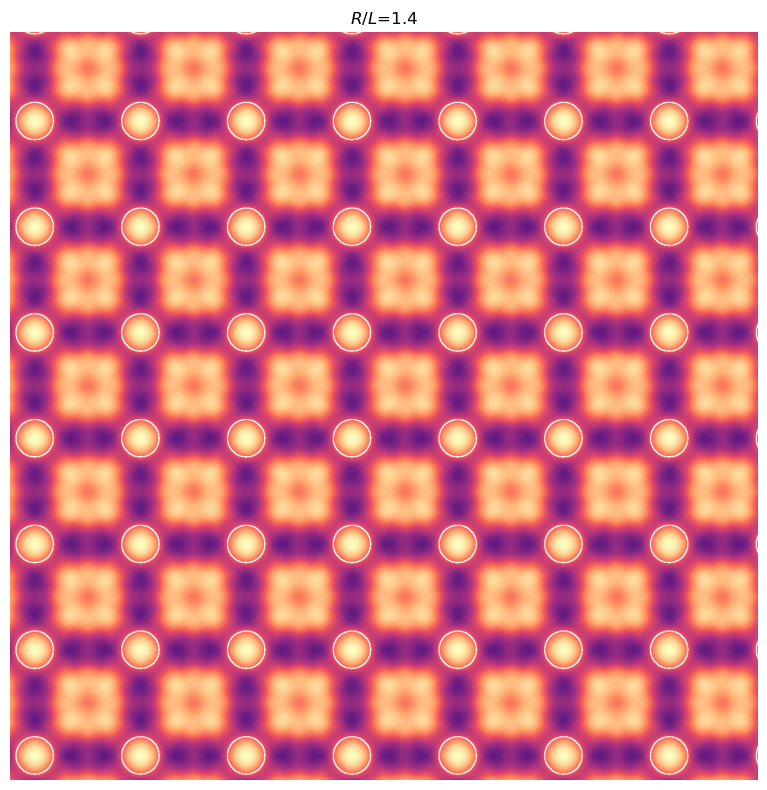

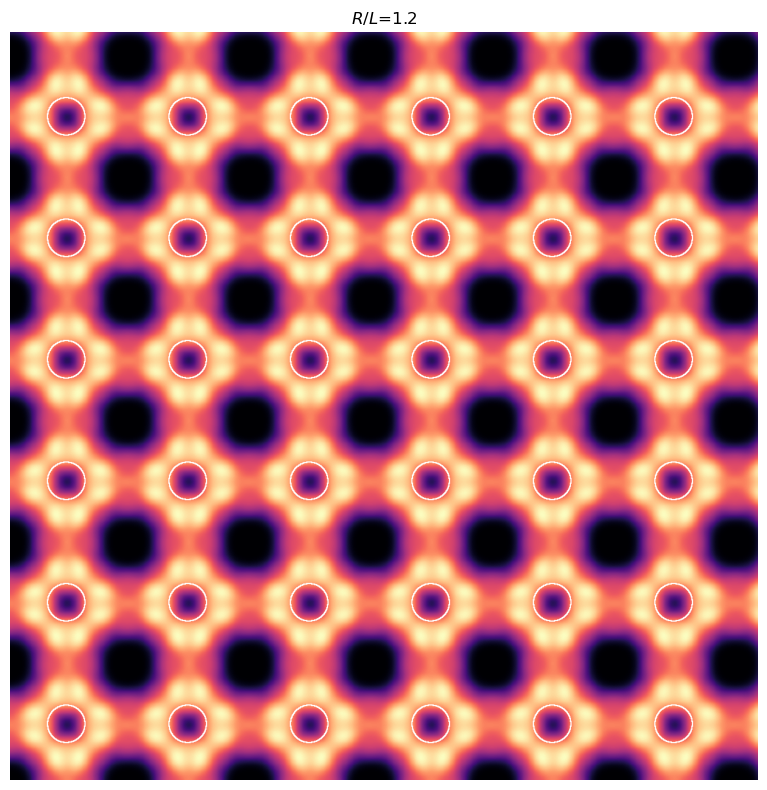

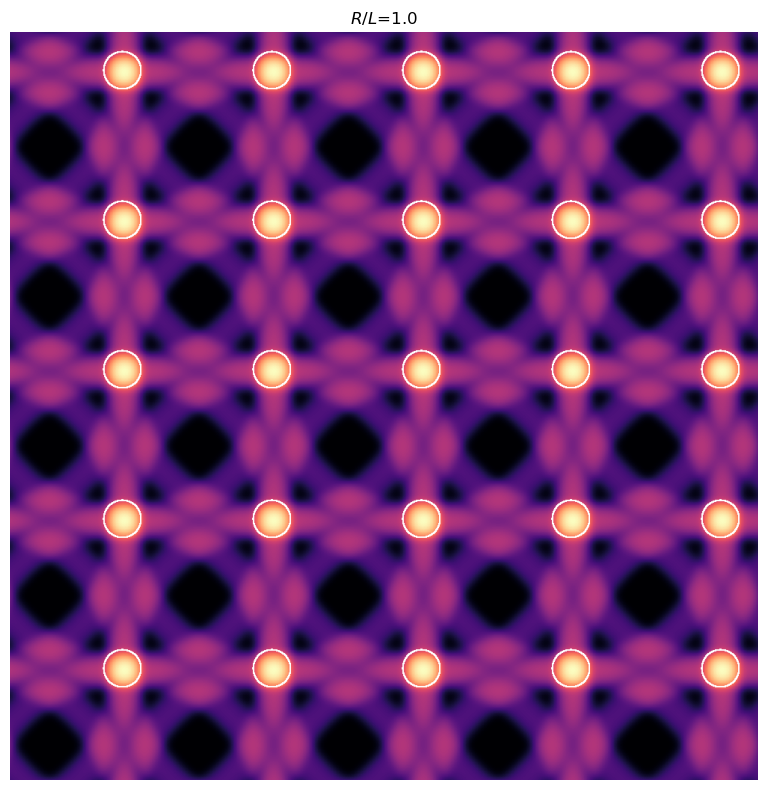

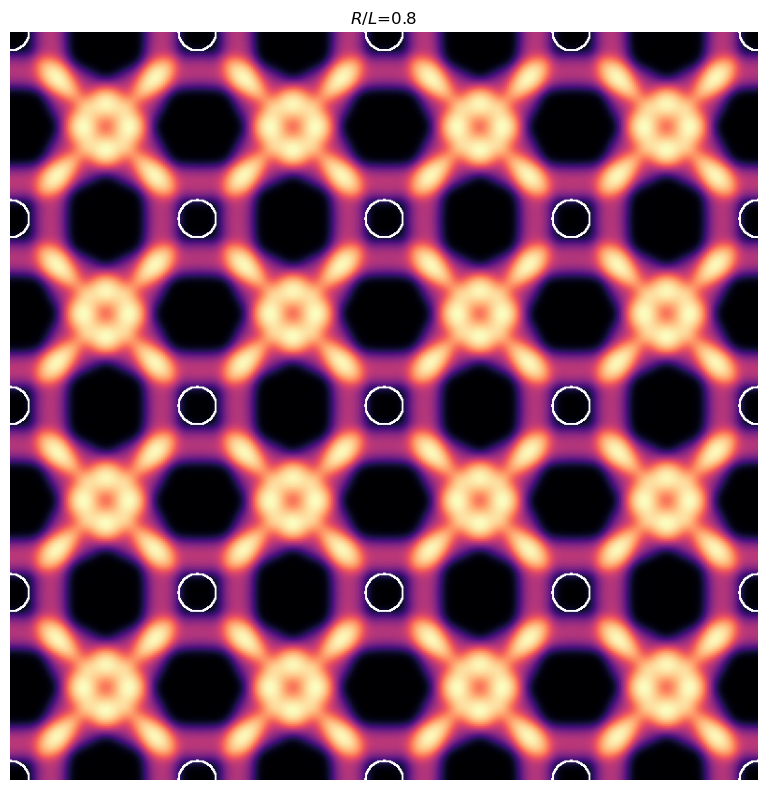

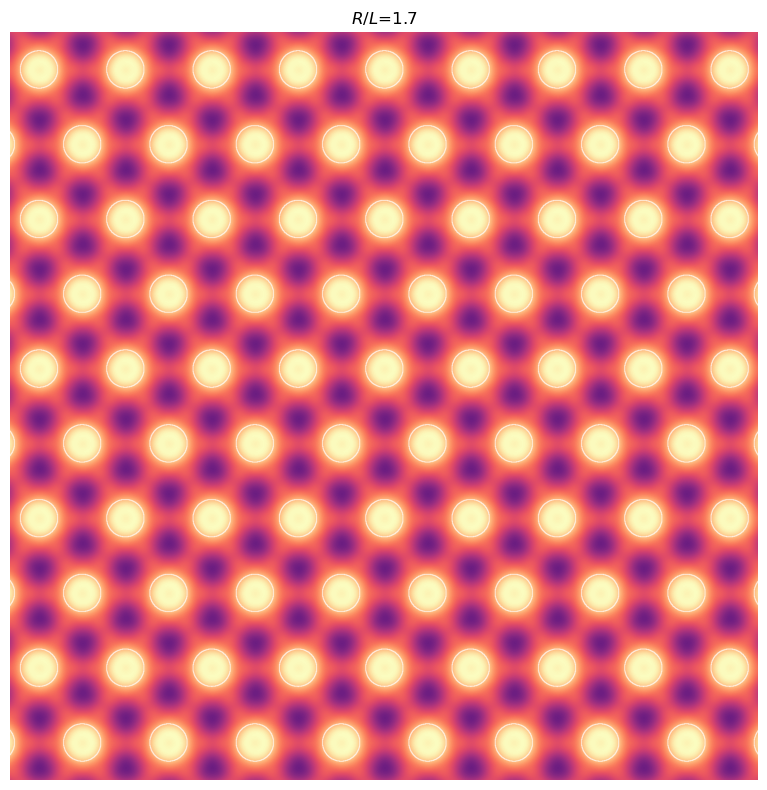

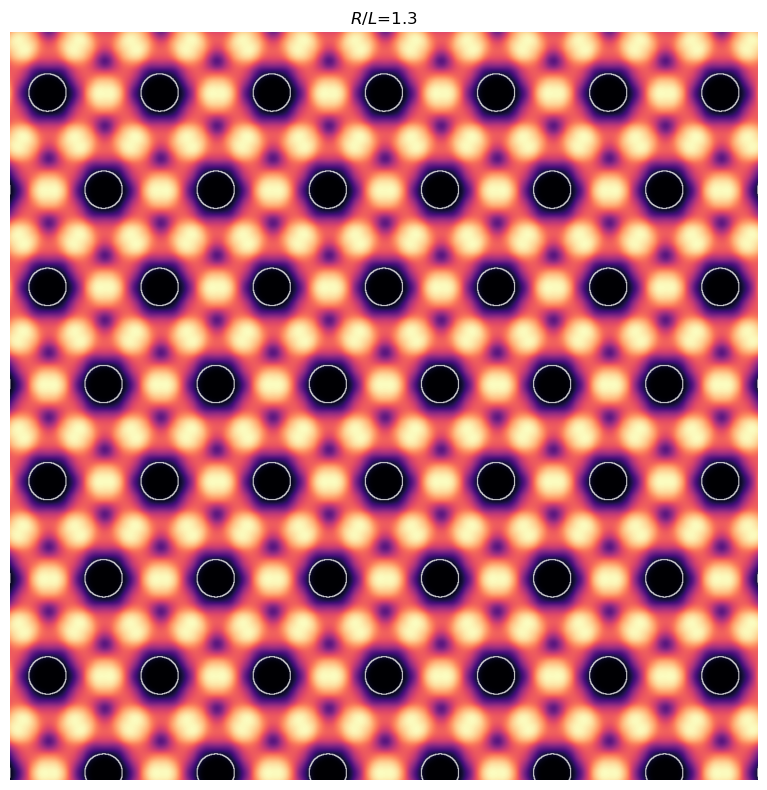

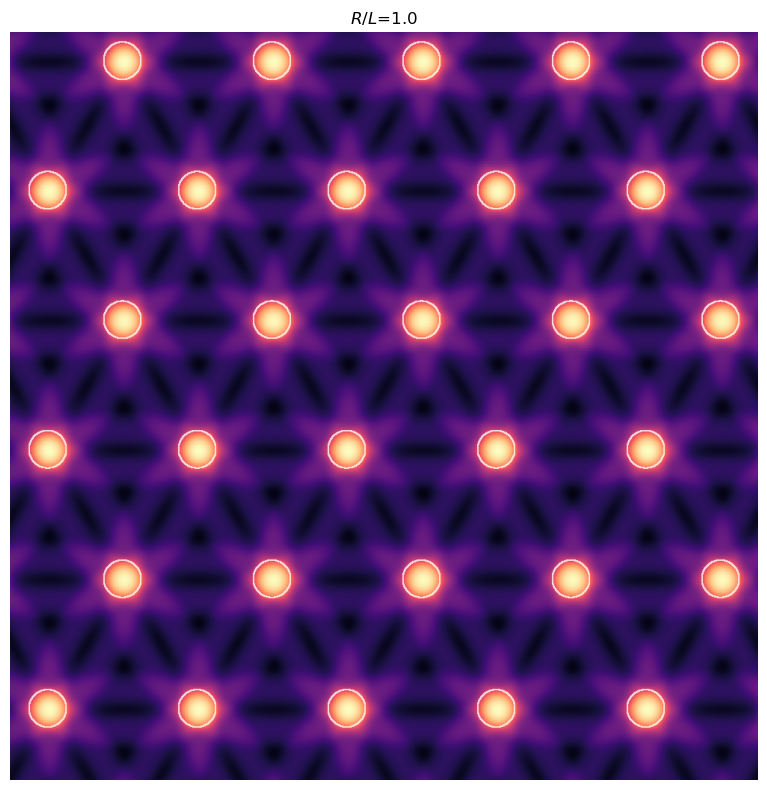

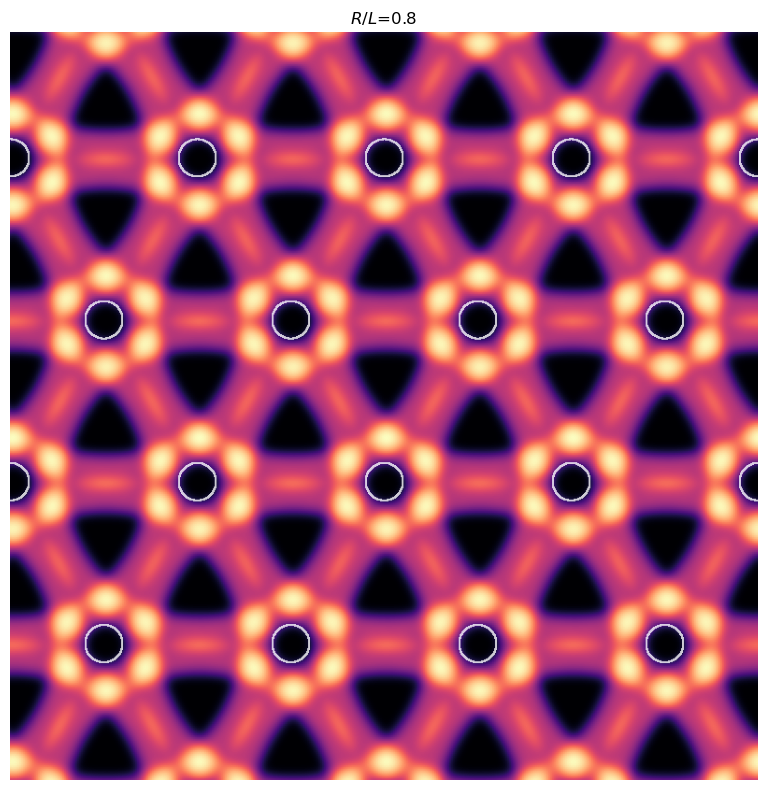

In [8]:
for i, ratio in enumerate([8 / 1.414, 6.5, 8, 10]):
    print(f"Drawing square heatmap ax {i+1}")
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    plot_square_CL_pattern(ax, Rr_ratio=8.0, Lr_ratio=ratio)
    fig.tight_layout()
    fig.savefig(f"subfigs-Fig3/CL-square-{i}.png", dpi=300)

for i, ratio in enumerate([8 / 1.732, 6, 8, 10]):
    print(f"Drawing hex heatmap ax {i+1}")
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    plot_hex_CL_pattern(ax, Rr_ratio=8.0, Lr_ratio=ratio)
    fig.tight_layout()
    fig.savefig(f"subfigs-Fig3/CL-hex-{i}.png", dpi=300)